In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

2023-05-06 15:10:15.968060: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 15:10:16.055893: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 15:10:16.057272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 15:10:18.156672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = np.random.random_sample((700,5))*10.24-5.12
y_train = np.array([[0, 0, 0, 0, 0] for _ in range(700)])

In [3]:
model = Sequential()

model.add(Dense(input_dim=X_train.shape[1], units=9, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 54        
                                                                 
 dense_1 (Dense)             (None, 15)                150       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='mse')

In [5]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
18/18 [==============================] - 2s 25ms/step - loss: 0.6709 - val_loss: 0.5330
Epoch 2/30
18/18 [==============================] - 0s 9ms/step - loss: 0.4088 - val_loss: 0.3422
Epoch 3/30
18/18 [==============================] - 0s 10ms/step - loss: 0.2637 - val_loss: 0.2365
Epoch 4/30
18/18 [==============================] - 0s 8ms/step - loss: 0.1832 - val_loss: 0.1729
Epoch 5/30
18/18 [==============================] - 0s 8ms/step - loss: 0.1321 - val_loss: 0.1338
Epoch 6/30
18/18 [==============================] - 0s 8ms/step - loss: 0.1012 - val_loss: 0.1057
Epoch 7/30
18/18 [==============================] - 0s 9ms/step - loss: 0.0798 - val_loss: 0.0852
Epoch 8/30
18/18 [==============================] - 0s 9ms/step - loss: 0.0642 - val_loss: 0.0709
Epoch 9/30
18/18 [==============================] - 0s 9ms/step - loss: 0.0533 - val_loss: 0.0600
Epoch 10/30
18/18 [==============================] - 0s 9ms/step - loss: 0.0450 - val_loss: 0.0513
Epoch 11/30
18/18

Text(0, 0.5, 'loss')

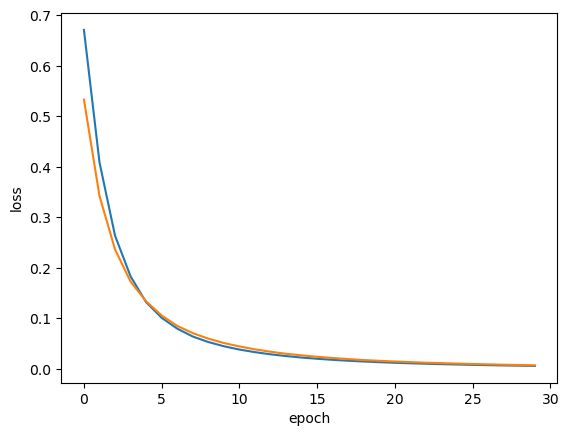

In [6]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [7]:
X_test = np.random.random_sample((200,5))*10.24-5.12
y_test = np.array([[0,0,0,0,0] for _ in range(200)])

In [8]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0065


0.0065048919059336185

In [12]:
model.save('../PROJ/models/rastrigin_model.hdf5')